In [10]:
import numpy as np
import tensorflow as tf
import os
import gzip

# Path ke folder hasil ekstrak gzip.zip kamu
data_path = r"C:\Users\santo\tensorflow_datasets\downloads\extracted"

# Fungsi bantu untuk load file .gz
def load_idxfile(path):
    with gzip.open(path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    return data

def load_labels(path):
    with gzip.open(path, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels

# Load file (pastikan nama file sesuai yang ada di dalam ZIP)
x_train = load_idxfile(os.path.join(data_path, 'emnist-balanced-train-images-idx3-ubyte.gz')).reshape(-1, 28, 28)
y_train = load_labels(os.path.join(data_path, 'emnist-balanced-train-labels-idx1-ubyte.gz'))

x_test = load_idxfile(os.path.join(data_path, 'emnist-balanced-test-images-idx3-ubyte.gz')).reshape(-1, 28, 28)
y_test = load_labels(os.path.join(data_path, 'emnist-balanced-test-labels-idx1-ubyte.gz'))

# Normalisasi
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Tambah dimensi channel
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("✅ Dataset berhasil dimuat secara manual")
print(f"Train set: {x_train.shape}, Test set: {x_test.shape}")

# --- Model CNN ---
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(62, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Latih model
model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=256,
    validation_data=(x_test, y_test)
)

# Simpan model
model.save("emnist_model.h5")
print("✅ Model berhasil disimpan sebagai emnist_model.h5")


✅ Dataset berhasil dimuat secara manual
Train set: (112800, 28, 28, 1), Test set: (18800, 28, 28, 1)
Epoch 1/5
441/441 [==============================] - 9s 19ms/step - loss: 1.0466 - accuracy: 0.6933 - val_loss: 0.6030 - val_accuracy: 0.8096
Epoch 2/5
441/441 [==============================] - 9s 20ms/step - loss: 0.5189 - accuracy: 0.8293 - val_loss: 0.5002 - val_accuracy: 0.8360
Epoch 3/5
441/441 [==============================] - 9s 20ms/step - loss: 0.4396 - accuracy: 0.8505 - val_loss: 0.4754 - val_accuracy: 0.8389
Epoch 4/5
441/441 [==============================] - 9s 21ms/step - loss: 0.3961 - accuracy: 0.8632 - val_loss: 0.4373 - val_accuracy: 0.8524
Epoch 5/5
441/441 [==============================] - 9s 21ms/step - loss: 0.3665 - accuracy: 0.8714 - val_loss: 0.4056 - val_accuracy: 0.8590
✅ Model berhasil disimpan sebagai emnist_model.h5


1/1 [==============================] - 0s 44ms/step


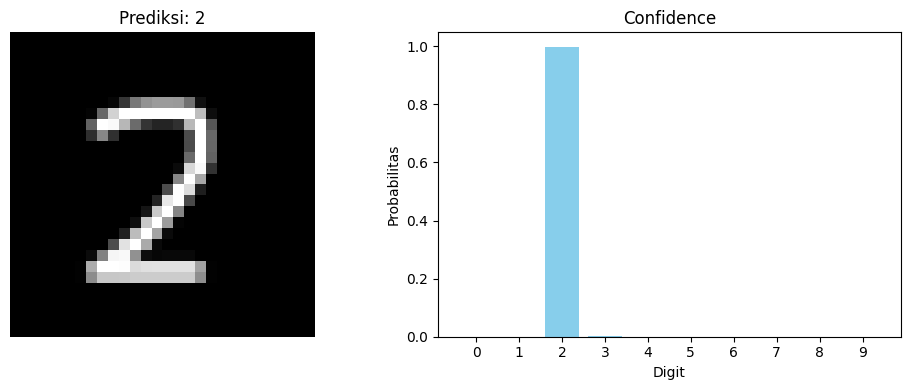

1/1 [==============================] - 0s 10ms/step


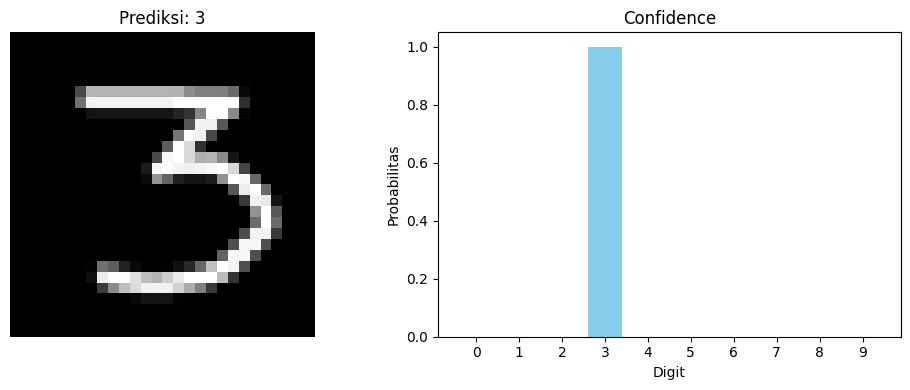

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load model
model = load_model("mnist_model.h5")

# Setup Tkinter Canvas
canvas_width = 280
canvas_height = 280
image1 = Image.new("L", (canvas_width, canvas_height), 255)
draw = ImageDraw.Draw(image1)

def paint(event):
    x1, y1 = (event.x - 8), (event.y - 8)
    x2, y2 = (event.x + 8), (event.y + 8)
    canvas.create_oval(x1, y1, x2, y2, fill='black', width=15)
    draw.ellipse([x1, y1, x2, y2], fill=0)

def clear_canvas():
    canvas.delete("all")
    draw.rectangle([0, 0, canvas_width, canvas_height], fill=255)

def predict_digit():
    # Resize dan normalisasi
    img = image1.resize((28, 28))
    img = ImageOps.invert(img)
    img = np.array(img).astype("float32") / 255.0
    img = img.reshape(1, 28, 28, 1)
    
    # Prediksi angka
    prediction = model.predict(img)[0]
    predicted_digit = np.argmax(prediction)

    # Tampilkan hasil
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Prediksi: {predicted_digit}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.bar(range(10), prediction, color='skyblue')
    plt.title("Confidence")
    plt.xlabel("Digit")
    plt.ylabel("Probabilitas")
    plt.xticks(range(10))
    plt.tight_layout()
    plt.show()

# GUI Tkinter
root = tk.Tk()
root.title("Digit Recognizer")

canvas = tk.Canvas(root, width=canvas_width, height=canvas_height, bg='white')
canvas.pack()

canvas.bind("<B1-Motion>", paint)

btn_predict = tk.Button(root, text="Prediksi", command=predict_digit)
btn_predict.pack(side=tk.LEFT)

btn_clear = tk.Button(root, text="Bersihkan", command=clear_canvas)
btn_clear.pack(side=tk.LEFT)

root.mainloop()
